In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
load_data=pd.read_csv("AllLoanData.csv",encoding = "ISO-8859-1")

C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147,151) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
load_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'timestamp'],
      dtype='object', length=152)

In [7]:
sh=load_data.shape
for column in load_data.columns:
    colmiss=(load_data[column].isnull().sum())/sh[0]
    if colmiss>0.8:
        load_data.drop(column,axis=1,inplace=True)
load_data['emp_length'].replace('n/a',0,inplace=True)
load_data['emp_length']=pd.Series(load_data.emp_length).str.replace('+', '').str.strip()
load_data['emp_length']=pd.Series(load_data.emp_length).str.replace('<', '').str.strip()
load_data['emp_length']=pd.Series(load_data.emp_length).str.replace('years', '').str.strip()
load_data['emp_length']=pd.Series(load_data.emp_length).str.replace('year', '').str.strip()
load_data['emp_length'].fillna(0,inplace=True)
load_data['emp_length']=load_data['emp_length'].astype(int)
load_data.zip_code=pd.to_numeric(load_data.zip_code.str[:3])
load_data.drop('title',axis=1,inplace=True)
load_data['mths_since_last_delinq'].fillna(load_data['mths_since_last_delinq'].max(),inplace=True)
load_data['annual_inc'].fillna(load_data['annual_inc'].mean(),inplace=True)
load_data['revol_util']=pd.Series(load_data.revol_util).str.replace('%', '').str.strip()
load_data['revol_util'].fillna(load_data['revol_util'].median(),inplace=True)
# load_data.drop('emp_title',axis=1,inplace=True)
load_data.term=pd.to_numeric(load_data.term.str[:3])
load_data['int_rate']=pd.Series(load_data.int_rate).str.replace('%', '').str.strip()
load_data['tot_coll_amt'].fillna(load_data['tot_coll_amt'].median(),inplace=True)
load_data['tot_cur_bal'].fillna(load_data['tot_cur_bal'].median(),inplace=True)
load_data['earliest_cr_line'].fillna(0,inplace=True)
load_data['last_pymnt_d'].fillna(0,inplace=True)
load_data['total_rev_hi_lim'].fillna(load_data['total_rev_hi_lim'].median(),inplace=True)
load_data["issue_d"]=load_data['issue_d'].str.split("-")
load_data['issue_year']=load_data['issue_d'].str[1]
load_data['issue_month']=load_data['issue_d'].str[0]
load_data['next_pymnt_d'].fillna(0,inplace=True)
load_data.drop('issue_d',axis=1,inplace=True)
load_data['last_credit_pull_d'].fillna(0,inplace=True)
load_data.fillna(0,inplace=True)

### Exploratory Data Analysis of Accepted Loan Data

We first Analysed the value distributions of Interest Rate and Loan Amount. We observe that the the distributions are close to normal distributions

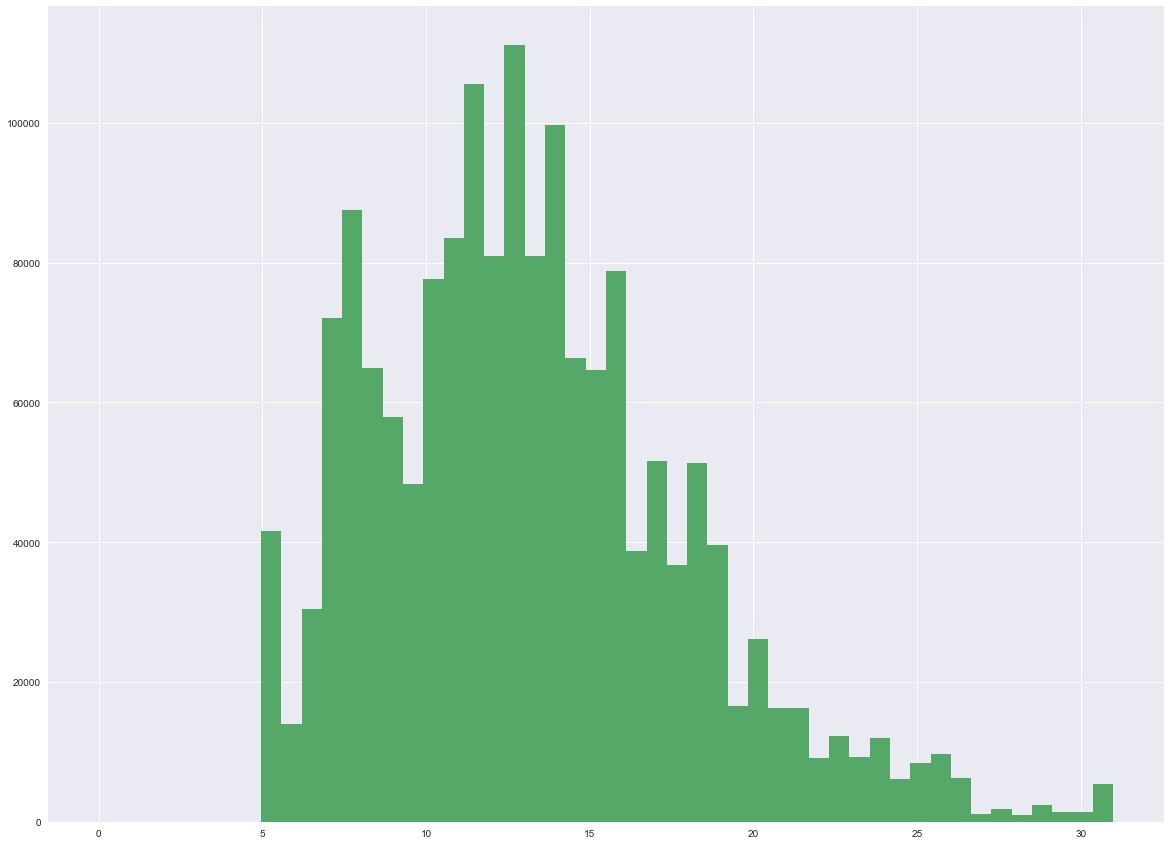

In [7]:
load_data['int_rate'].hist(bins=50,figsize=(20,15))
plt.show()

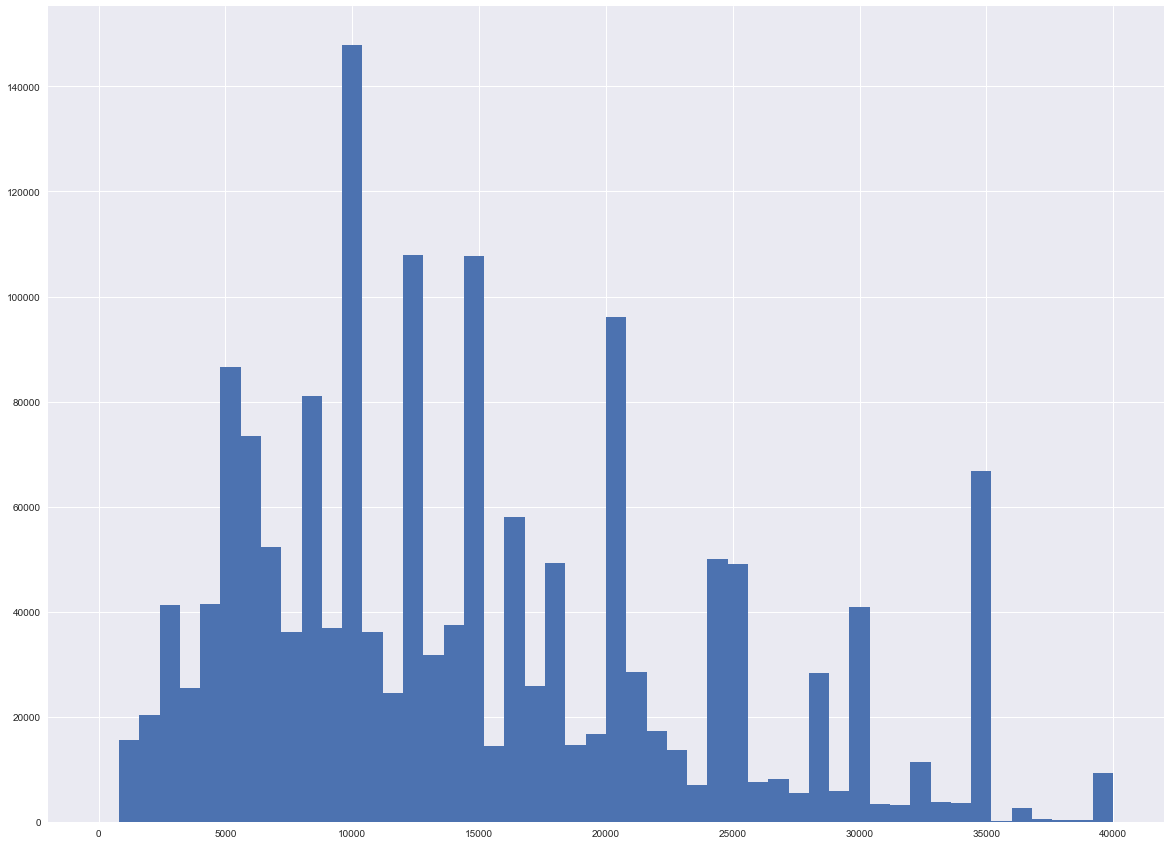

In [8]:
## Distribution of Loan Amount
load_data['loan_amnt'].hist(bins=50,figsize=(20,15))
plt.show()

#### Study of Loan Amount

We are analysing the the minimum, maximum mean values of the Loan Amount present in the data. The mean loan amount is 14700.31 and the max loan amount is 40000

In [9]:
## Study of Loan Amount
load_data['loan_amnt'].describe()

count    1.646773e+06
mean     1.473331e+04
std      8.803715e+03
min      0.000000e+00
25%      8.000000e+03
50%      1.260000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

#### Study of Interest Rate

We are analysing the the minimum, maximum mean values of Interest rate present in the data. The mean interest rate is 13.21% and the max interest rate is 30 %

In [10]:
## Study of Interest Rate
load_data['int_rate']=pd.Series(load_data['int_rate']).convert_objects(convert_numeric=True)
load_data['int_rate'].describe()

C:\Users\jaini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


count    1.646773e+06
mean     1.321859e+01
std      4.704242e+00
min      0.000000e+00
25%      9.760000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

#### Analysis of all column values

In [11]:
## Study of all columns
load_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,zip_code,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,...,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06,1.646773e+06
mean,1.473331e+04,1.472608e+04,1.470244e+04,4.276767e+01,1.321859e+01,4.394130e+02,5.722566e+00,7.730491e+04,5.093370e+02,1.852070e+01,...,8.737331e-02,2.007799e+00,8.993537e+01,4.416248e+01,1.290724e-01,5.810819e-02,1.682633e+05,4.922924e+04,2.127796e+04,4.117040e+04
std,8.803715e+03,8.800829e+03,8.805933e+03,1.079927e+01,4.704242e+00,2.592266e+02,3.744850e+00,1.207276e+05,3.113980e+02,1.098643e+01,...,5.054834e-01,1.820951e+00,2.094835e+01,3.640227e+01,3.739419e-01,4.219114e-01,1.782942e+05,4.864411e+04,2.174429e+04,4.387634e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,3.600000e+01,9.760000e+00,2.517700e+02,2.000000e+00,4.600000e+04,2.280000e+02,1.207000e+01,...,0.000000e+00,1.000000e+00,8.970000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.526600e+04,1.992200e+04,7.300000e+03,1.246600e+04
50%,1.260000e+04,1.260000e+04,1.250000e+04,3.600000e+01,1.274000e+01,3.770400e+02,6.000000e+00,6.500000e+04,4.710000e+02,1.788000e+01,...,0.000000e+00,2.000000e+00,9.700000e+01,4.000000e+01,0.000000e+00,0.000000e+00,1.043140e+05,3.687500e+04,1.480000e+04,3.063500e+04
75%,2.000000e+04,2.000000e+04,2.000000e+04,6.000000e+01,1.599000e+01,5.803400e+02,1.000000e+01,9.200000e+04,8.010000e+02,2.432000e+01,...,0.000000e+00,3.000000e+00,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.464460e+05,6.266800e+04,2.800000e+04,5.611900e+04
max,4.000000e+04,4.000000e+04,4.000000e+04,6.000000e+01,3.099000e+01,1.719830e+03,1.000000e+01,1.100000e+08,9.990000e+02,9.990000e+02,...,4.200000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.105500e+06,2.101913e+06


#### Calculating Risk_Score



In [15]:
load_data['Risk_Score'] = (load_data.fico_range_low + load_data.fico_range_high) / 2
load_data['issue_year'] = load_data['issue_year'].astype(int)

### Distribution of Risk Score

We notice that most of the Risk Scores are between the range of 600 and 830. This must be the case as these borrowers have approved loans hence, their Risk Scores will be in a good range

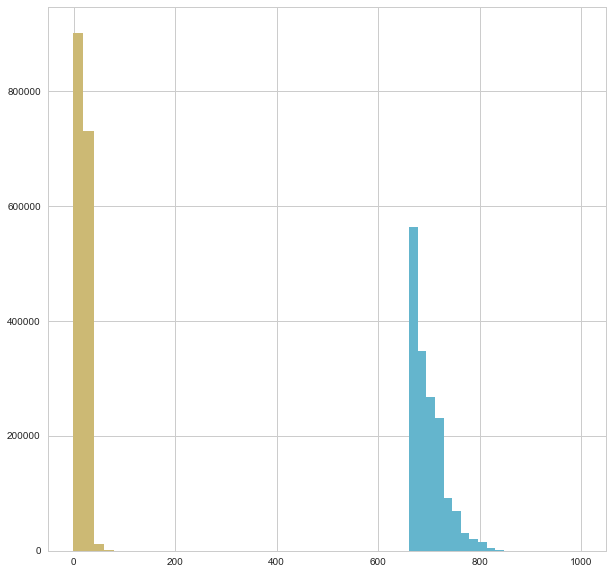

In [40]:
load_data['Risk_Score'].hist(bins=50,figsize=(10,10))
plt.show()

#### Analysis of Risk Score with Issue Year
We note that the mean risk score does not change significantly

    issue_year        mean
11        2017  700.229349
10        2016  697.378663
9         2015  695.649924
8         2014  694.497345
7         2013  696.998338
6         2012  703.387407
5         2011  716.991713
4         2010  715.041796
3         2009  716.965916
2         2008  699.101964
1         2007  691.966833
0            0    0.000000


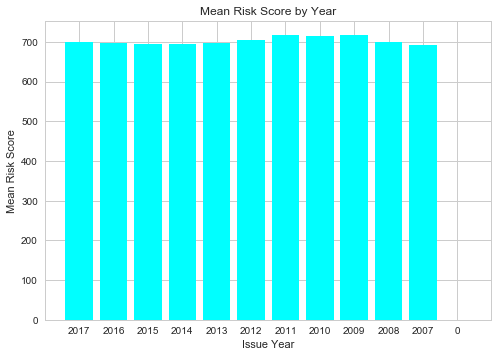

In [30]:
import seaborn as sns
# sns.set(style="whitegrid")
risk_trend=load_data[['issue_year','Risk_Score']].groupby(['issue_year'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=False)
print(risk_trend)
# g = sns.factorplot(x="issue_year", y="count", hue="Approval", data=approval_trend,size=7, kind="bar", palette="muted")
# g.despine(left=True)
# plt.show()
# flights = risk_trend.pivot("issue_year", "mean")
# ax = sns.heatmap(risk_trend['issue_year'])

##Analysis of Average Interest Rate by Issue Year
##Mean Interest Rate was maximum in year 2013


x = np.array(range(len(risk_trend)))
y = risk_trend['mean']
my_xticks = risk_trend['issue_year']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.bar(x,y,color='cyan')
plt.title('Mean Risk Score by Year')
plt.ylabel('Mean Risk Score')
plt.xlabel('Issue Year')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()




### Analysis of Interest Rate by Issue Year

Issue Year is the year when the loans were funded. Hence, we treid to understand the mean interest Rate for each year. Mean Interest Rate was maximum in year 2013 of 14.53%. We observe that the interest rate steadily grew till the year 2007 and fell slightly till 2011 and rose again at its highest in 2013.

    issue_year       mean
0            0   0.000000
1         2007  11.825108
2         2008  12.061964
3         2009  12.437247
4         2010  11.985268
5         2011  12.223365
6         2012  13.637707
7         2013  14.531832
8         2014  13.769665
9         2015  12.599816
10        2016  13.042459
11        2017  13.380624


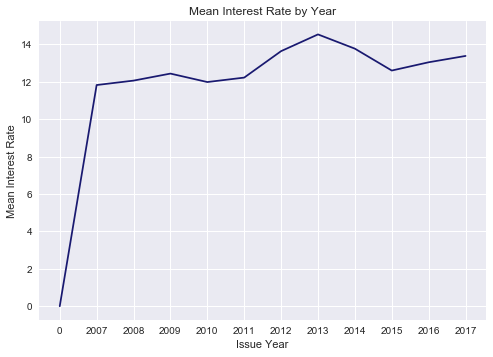

In [12]:
##Analysis of Average Interest Rate by Issue Year
##Mean Interest Rate was maximum in year 2013
load_data['issue_year'] = load_data['issue_year'].astype(int)
interestrate_trend=load_data[['int_rate','issue_year']].groupby(['issue_year'])['int_rate'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=True)
print(interestrate_trend)

x = np.array(range(len(interestrate_trend)))
y = interestrate_trend['mean']
my_xticks = interestrate_trend['issue_year']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.plot(x,y,color='midnightblue')
plt.title('Mean Interest Rate by Year')
plt.ylabel('Mean Interest Rate')
plt.xlabel('Issue Year')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Analysis of Loan Amount with Issue year

Next we analyzed the avarage loan amounts requested vs their issue years. We observed that the loan amounts grew steadily from 2007 to 2017.

    issue_year          mean
0            0      0.000000
1         2007   8254.519071
2         2008   8825.428333
3         2009   9833.033516
4         2010  10528.240408
5         2011  12047.503568
6         2012  13461.763796
7         2013  14707.413733
8         2014  14870.152720
9         2015  15240.282254
10        2016  14734.039046
11        2017  14672.662658


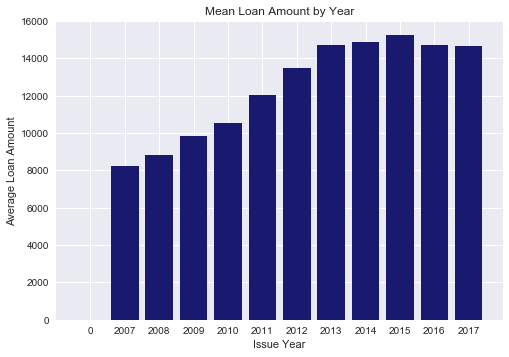

In [13]:
##Analysis of Average Interest Rate by Issue Year
##Average loan amount was the highest in issue year 2015
# load_data['issue_year'] = load_data['issue_year'].astype(int)
loan_trend=load_data[['loan_amnt','issue_year']].groupby(['issue_year'])['loan_amnt'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=True)
print(loan_trend)

x = np.array(range(len(loan_trend)))
y = loan_trend['mean']
my_xticks = loan_trend['issue_year']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.bar(x,y,color='midnightblue')
plt.title('Mean Loan Amount by Year')
plt.ylabel('Average Loan Amount')
plt.xlabel('Issue Year')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Analysis of Loans funded by Issue Year

We wanted to analyze if there was a change in the loan amounts in an Issues year over the funded loan amount vs Issue year. The funded loan amount is the amount that was actually commited at the point in time . We observed that the loan amount and the funded loan amount are in sync.

    issue_year          mean
0            0      0.000000
1         2007   8254.519071
2         2008   8825.428333
3         2009   9833.033516
4         2010  10528.240408
5         2011  12047.503568
6         2012  13461.763796
7         2013  14707.413733
8         2014  14870.152720
9         2015  15240.282254
10        2016  14734.039046
11        2017  14672.662658


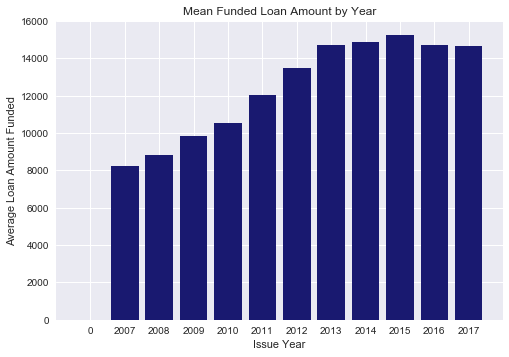

In [14]:
##Analysis of Average Interest Rate by Issue Year
##Average loan amount was the highest in issue year 2015
# load_data['issue_year'] = load_data['issue_year'].astype(int)
funded_amnt_trend=load_data[['funded_amnt','issue_year']].groupby(['issue_year'])['funded_amnt'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=True)
print(loan_trend)

x = np.array(range(len(loan_trend)))
y = loan_trend['mean']
my_xticks = loan_trend['issue_year']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
#plt.xticks(rotation=70)
plt.bar(x,y,color='midnightblue')
plt.title('Mean Funded Loan Amount by Year')
plt.ylabel('Average Loan Amount Funded')
plt.xlabel('Issue Year')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Analysis of Mean Loan Amount by State

The state is the field provided by the borrower during loan application. Hence, we tried to analyse if Mean loan Amounts granted by state. The Maximum mean loan amount was provided to Alaska but remains consostent for the other states.

   addr_state          mean
0           0      0.000000
13         IA   8148.214286
27         MT  13614.360894
47         VT  13681.646741
30         NE  13723.265033
42         SD  13768.131785
38         OR  13776.157038
3          AR  13807.224196
40         RI  13966.601267
10         FL  13982.751506
14         ID  13984.033517
34         NV  14015.868353
23         MI  14049.769131
36         OH  14072.894898
18         KY  14130.682032
49         WI  14146.230780
4          AZ  14207.875747
25         MO  14272.330836
24         MN  14296.634534
22         ME  14396.956740
16         IN  14422.106584
2          AL  14430.185131
39         PA  14450.775004
43         TN  14512.870352
28         NC  14517.655315
9          DE  14527.502680
17         KS  14528.261483
26         MS  14551.742459
35         NY  14563.621291
50         WV  14614.580101
19         LA  14620.837880
41         SC  14671.727404
33         NM  14686.441396
31         NH  14713.111715
37         OK  14724

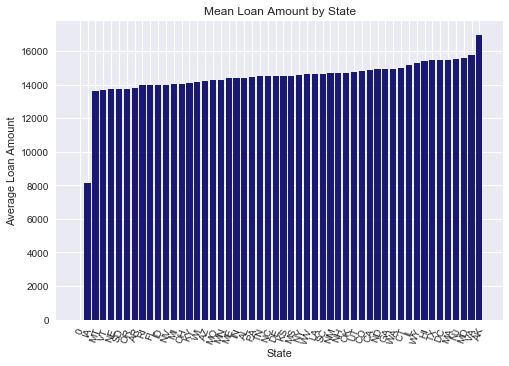

In [15]:
###Analysis of average interest rate by states
### We observe that the average loan amount is the highest for Alaska
load_data['addr_state'] = load_data['addr_state'].astype(str)
state_loan=load_data[['loan_amnt','addr_state']].groupby(['addr_state'])['loan_amnt'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(state_loan)


x = np.array(range(len(state_loan)))
y = state_loan['mean']
my_xticks = state_loan['addr_state']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (10,15)
plt.bar(x,y,color='midnightblue')

plt.title('Mean Loan Amount by State')
plt.ylabel('Average Loan Amount')
plt.xlabel('State')

# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()




### Analysis of Interest Rates by State

We observe that the interest rates are also close to consistent and the mean interest rate is the highest for Hawaii

   addr_state       mean
0           0   0.000000
8          DC  12.597183
13         IA  12.631429
20         MA  12.741982
31         NH  12.818025
47         VT  12.950532
49         WI  12.984657
22         ME  13.033310
6          CO  13.043898
27         MT  13.045139
38         OR  13.072393
15         IL  13.081398
32         NJ  13.101538
7          CT  13.107056
5          CA  13.109194
4          AZ  13.111113
24         MN  13.114457
17         KS  13.133930
44         TX  13.140547
40         RI  13.163052
25         MO  13.168160
50         WV  13.227250
46         VA  13.242628
36         OH  13.251169
33         NM  13.270095
45         UT  13.286653
23         MI  13.289681
39         PA  13.292420
11         GA  13.298445
48         WA  13.299116
42         SD  13.301248
10         FL  13.304579
19         LA  13.322322
9          DE  13.325098
16         IN  13.325705
18         KY  13.333126
35         NY  13.343936
51         WY  13.349520
28         NC  13.349923


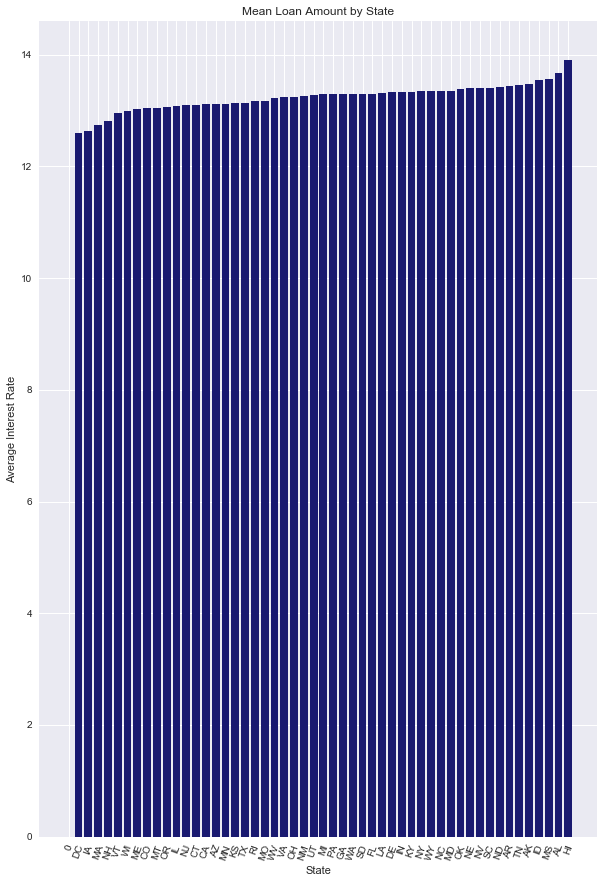

In [77]:
load_data['addr_state'] = load_data['addr_state'].astype(str)
state_loan=load_data[['int_rate','addr_state']].groupby(['addr_state'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(state_loan)


x = np.array(range(len(state_loan)))
y = state_loan['mean']
my_xticks = state_loan['addr_state']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (10,15)
plt.bar(x,y,color='midnightblue')

plt.title('Mean Loan Amount by State')
plt.ylabel('Average Interest Rate')
plt.xlabel('State')

# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Analysis of Total  Amount Granted to a State

we observe that the total loan amount granted was the highest for the state of Alaska

   addr_state           sum
0           0      0.000000
13         IA   8148.214286
27         MT  13614.360894
47         VT  13681.646741
30         NE  13723.265033
42         SD  13768.131785
38         OR  13776.157038
3          AR  13807.224196
40         RI  13966.601267
10         FL  13982.751506
14         ID  13984.033517
34         NV  14015.868353
23         MI  14049.769131
36         OH  14072.894898
18         KY  14130.682032
49         WI  14146.230780
4          AZ  14207.875747
25         MO  14272.330836
24         MN  14296.634534
22         ME  14396.956740
16         IN  14422.106584
2          AL  14430.185131
39         PA  14450.775004
43         TN  14512.870352
28         NC  14517.655315
9          DE  14527.502680
17         KS  14528.261483
26         MS  14551.742459
35         NY  14563.621291
50         WV  14614.580101
19         LA  14620.837880
41         SC  14671.727404
33         NM  14686.441396
31         NH  14713.111715
37         OK  14724

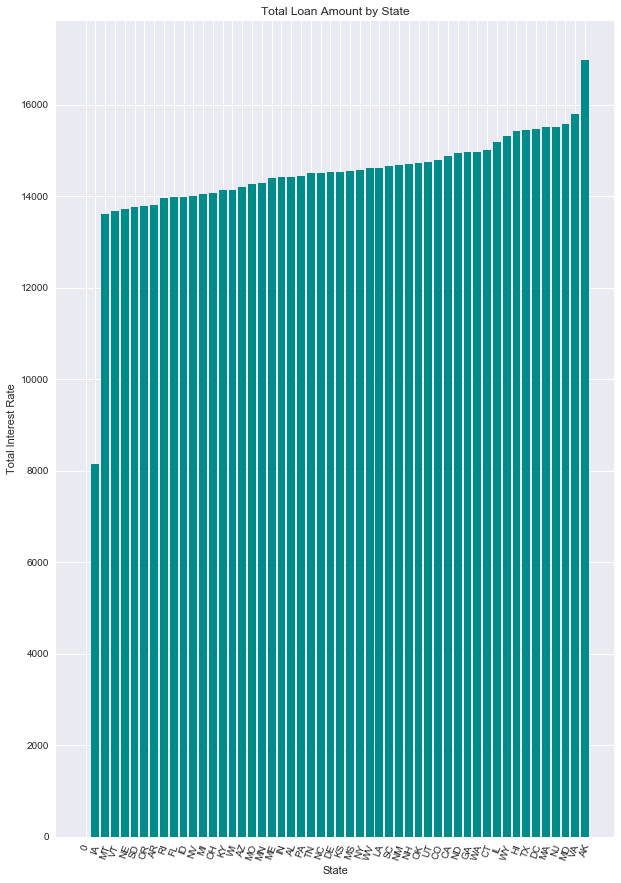

In [16]:
load_data['addr_state'] = load_data['addr_state'].astype(str)
state_loan=load_data[['loan_amnt','addr_state']].groupby(['addr_state'])['loan_amnt'].mean().reset_index(name='sum').sort_values(['sum'],ascending=True)
print(state_loan)


x = np.array(range(len(state_loan)))
y = state_loan['sum']
my_xticks = state_loan['addr_state']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (10,15)
plt.bar(x,y,color='darkcyan')

plt.title('Total Loan Amount by State')
plt.ylabel('Total Interest Rate')
plt.xlabel('State')

# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Loan Amount by Purpose

We tried to analyse the loan amounts by purpose.

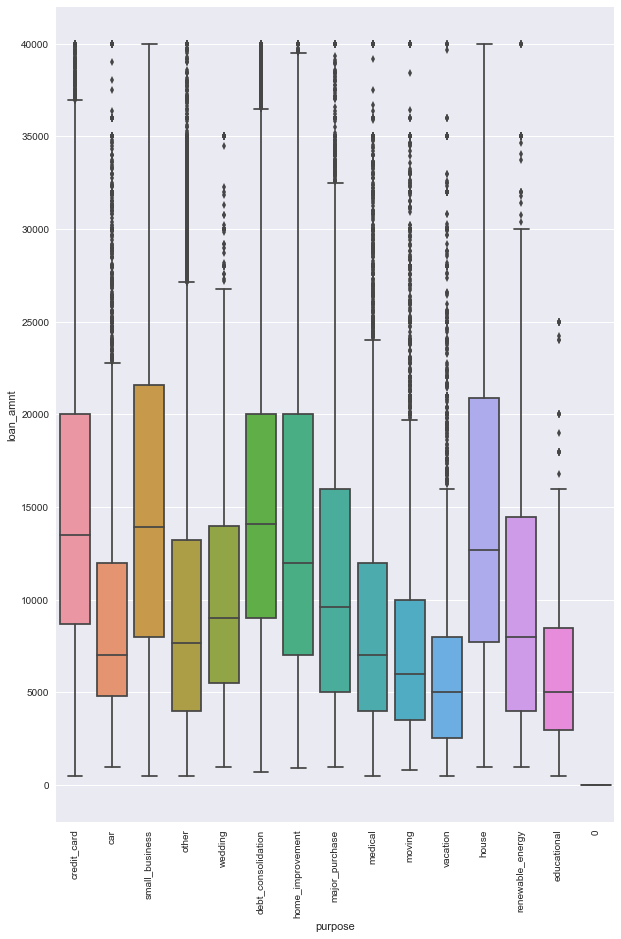

In [17]:
#### Analysis of Average Loan Amount by Purpose

sns.boxplot(x="purpose", y="loan_amnt", data=load_data)
plt.xticks(rotation=90)
plt.show()

#### Analysis of Interest Rate by Purpose
We tried to anaylize the range of interest rates provided for each purpose specifide by the borrower. We guage that home_improvement and major purchases have the same range of interest rates provided. Additionally the interest rates are go to the highest for purpose House.

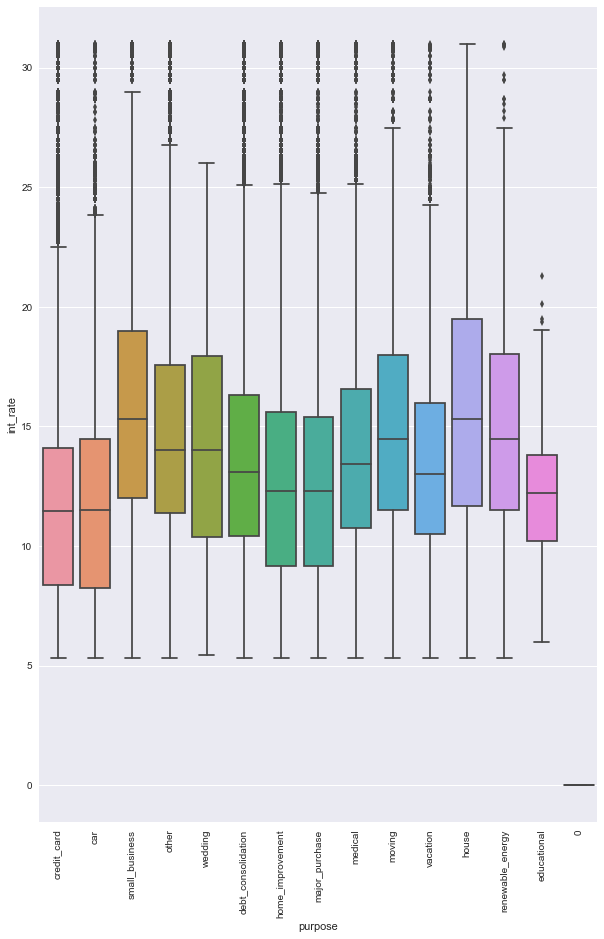

In [18]:
sns.boxplot(x="purpose", y="int_rate", data=load_data)
plt.xticks(rotation=90)
plt.show()

### Analysis of Number of Loan by Purpose
We analysed the number of loans issues based on purpose.

               purpose   count
3   debt_consolidation  955783
2          credit_card  363962
5     home_improvement  109031
10               other   93576
7       major_purchase   35596


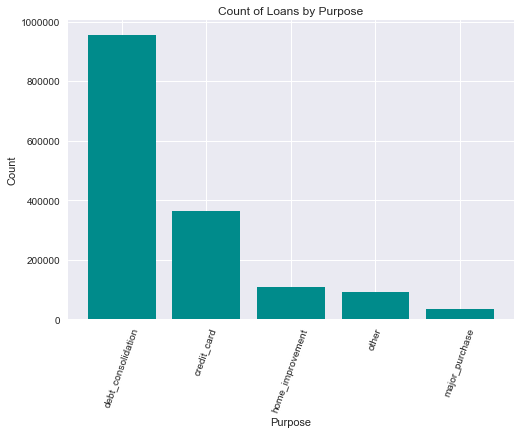

In [9]:
# load_data['addr_state'] = load_data['addr_state'].astype(str)
purpose_loan=load_data[['purpose']].groupby(['purpose'])['purpose'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(5)
print(purpose_loan)


x = np.array(range(len(purpose_loan)))
y = purpose_loan['count']
my_xticks = purpose_loan['purpose']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
# plt.rcParams["figure.figsize"] = (10,15)
plt.bar(x,y,color='darkcyan')

plt.title('Count of Loans by Purpose')
plt.ylabel('Count')
plt.xlabel('Purpose')

# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

In [ ]:
load_data.columns

#### Analysis of DTI

Next, we tried to understand the ratio of debt payment by the total debt obligation of all employees by understanding distributionby issue year. Since, this is a ratio it cannot be aggregated further

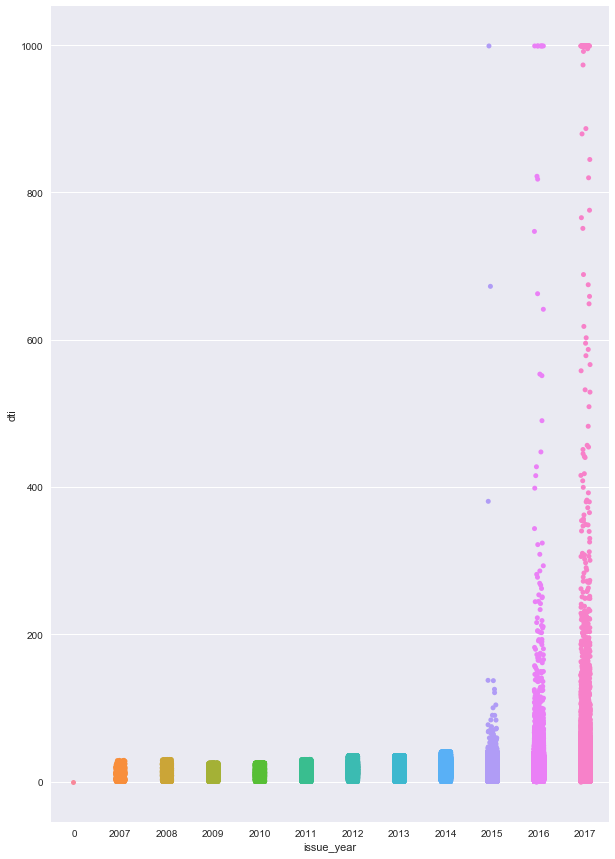

In [21]:
ax = sns.stripplot(x="issue_year", y="dti", data=load_data, jitter=True)
plt.show()


In [22]:
df1=load_data[load_data["dti"]<999].groupby(["issue_year"])
print(df1.count())

                id  loan_amnt  funded_amnt  funded_amnt_inv    term  int_rate  \
issue_year                                                                      
0                1          1            1                1       1         1   
2007           603        603          603              603     603       603   
2008          2393       2393         2393             2393    2393      2393   
2009          5281       5281         5281             5281    5281      5281   
2010         12537      12537        12537            12537   12537     12537   
2011         21721      21721        21721            21721   21721     21721   
2012         53365      53365        53365            53365   53365     53365   
2013        134814     134814       134814           134814  134814    134814   
2014        235627     235627       235627           235627  235627    235627   
2015        421092     421092       421092           421092  421092    421092   
2016        434400     43440

#### Analysis of Number of Loans by Term and Purpose

We first analysed the term of the loan with the employment title for the top 15 number of loans. We observed that the highest was for the employee title Teacher with a term of 36 months.

Next we analysed the count of loans by term. Clearly, it was visible that the maximum loans were provided with the term of 36 months or 3 years.

               emp_title  term  count
1                      0  36.0  83518
381327           Teacher  36.0  19819
2                      0  60.0  18914
224049           Manager  36.0  16974
262910             Owner  36.0  11010
381328           Teacher  60.0   8188
307534  Registered Nurse  36.0   8017
299523                RN  36.0   7845
224050           Manager  60.0   7268
372440        Supervisor  36.0   7111
122705            Driver  36.0   6980
323820             Sales  36.0   6606
291161   Project Manager  36.0   5374
256222    Office Manager  36.0   5117
462027             owner  36.0   4947
   term    count
1  36.0  1182403
2  60.0   464369
0   0.0        1


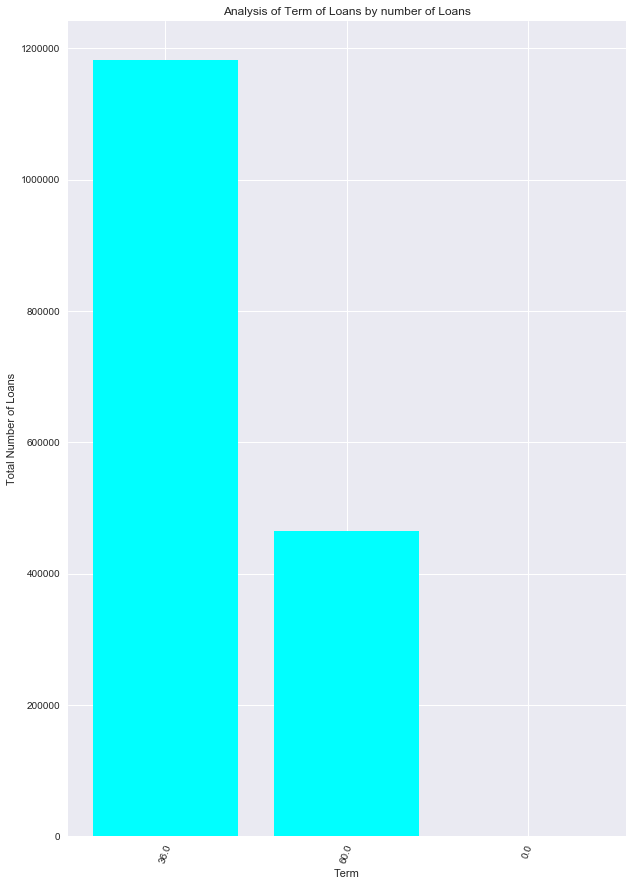

In [23]:
term_title_trend=load_data[['emp_title','term']].groupby(['emp_title','term'])['term'].count().reset_index(name='count').sort_values(['count'],ascending=False).head(15)
print(term_title_trend)

term_trend=load_data[['term']].groupby(['term'])['term'].count().reset_index(name='count').sort_values(['count'],ascending=False)
print(term_trend)

x = np.array(range(len(term_trend)))
y = term_trend['count']
my_xticks = term_trend['term']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='cyan')
plt.title('Analysis of Term of Loans by number of Loans')
plt.ylabel('Total Number of Loans')
plt.xlabel('Term')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Interest Rate by Term
Analysed the Avereage interest interest rate by term. The mean interest rate is 12 % for laons with a term of 36 months and 16% for a loan with a term of 60  months

   term       mean
0   0.0   0.000000
1  36.0  12.051338
2  60.0  16.190758


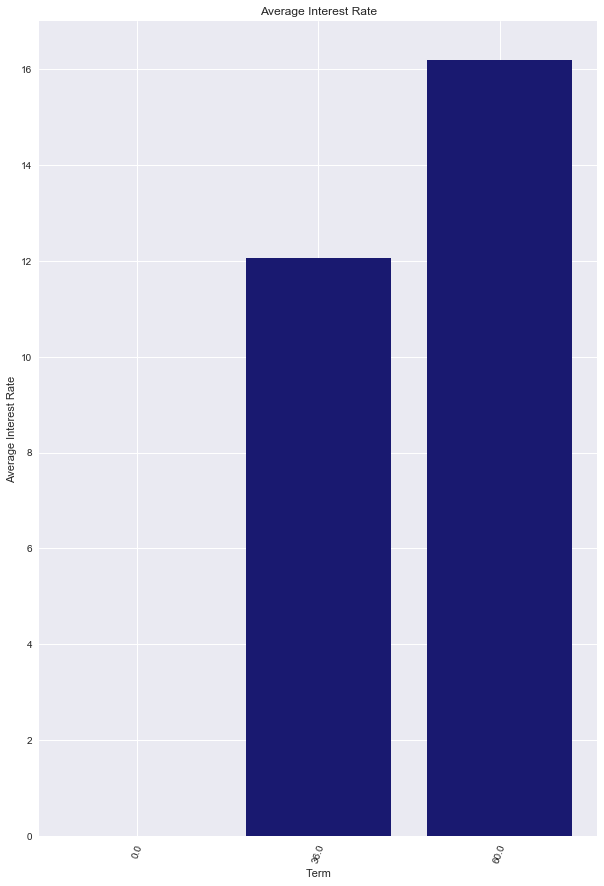

In [24]:
ir_term_trend=load_data[['int_rate','term']].groupby(['term'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(ir_term_trend)

x = np.array(range(len(ir_term_trend)))
y = ir_term_trend['mean']
my_xticks = ir_term_trend['term']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='midnightblue')
plt.title('Average Interest Rate')
plt.ylabel('Average Interest Rate')
plt.xlabel('Term')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Count of Loans by Purpose

We observe that the most number of loans were taken for the purpose of Debt Consolidation. As observed above we notice that the maximum amount issued by purpose was also for debt consolidation after purpose House.

               purpose   count
0                    0       1
4          educational     423
11    renewable_energy    1094
14             wedding    2350
6                house    7268
13            vacation   11152
9               moving   11388
1                  car   17641
12      small_business   18613
8              medical   18901
7       major_purchase   35596
10               other   93574
5     home_improvement  109031
2          credit_card  363960
3   debt_consolidation  955781


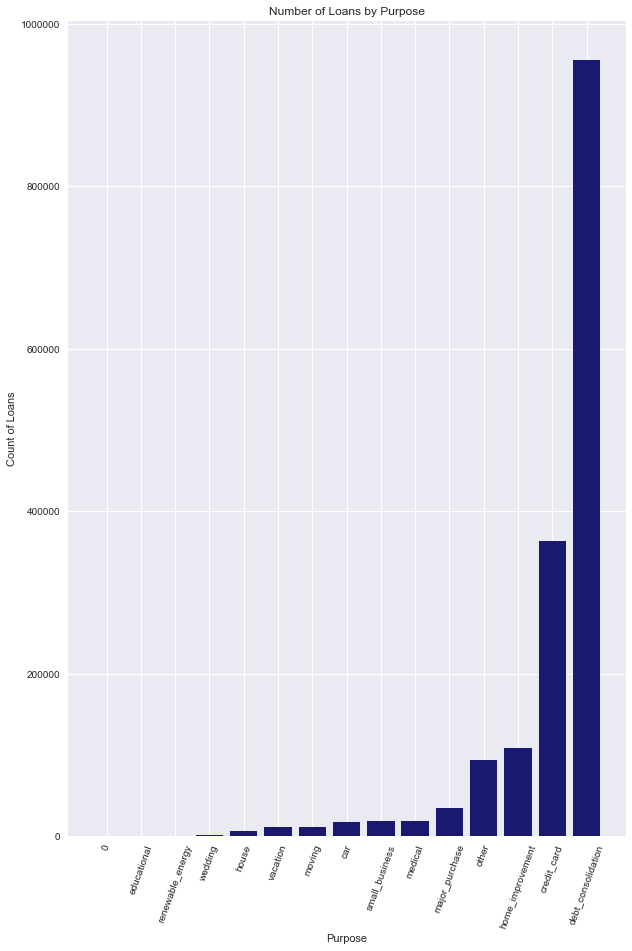

In [25]:
purpose_trend=load_data[['purpose']].groupby(['purpose'])['purpose'].count().reset_index(name='count').sort_values(['count'],ascending=True)
print(purpose_trend)

x = np.array(range(len(purpose_trend)))
y = purpose_trend['count']
my_xticks = purpose_trend['purpose']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='midnightblue')
plt.title('Number of Loans by Purpose')
plt.ylabel('Count of Loans')
plt.xlabel('Purpose')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Application Type by Interest Rate

We first analysed Application type on the basis of Issue Year and Average Interest Rate . As per the results it is observed that the Join Applications were made in 2015,2016 and 2017. 

Next we observed the application type by avaerage interest rate. Joint Applications had a higher interest rate.

   application_type  issue_year       mean
0                 0           0   0.000000
1        Individual        2007  11.825108
4        Individual        2010  11.985268
2        Individual        2008  12.061964
5        Individual        2011  12.223365
3        Individual        2009  12.437247
9        Individual        2015  12.596691
10       Individual        2016  13.019165
11       Individual        2017  13.327626
6        Individual        2012  13.637707
8        Individual        2014  13.769665
14        Joint App        2017  14.010614
13        Joint App        2016  14.170513
7        Individual        2013  14.531832
12        Joint App        2015  15.171781
  application_type       mean
0                0   0.000000
1       Individual  13.200408
2        Joint App  14.068524


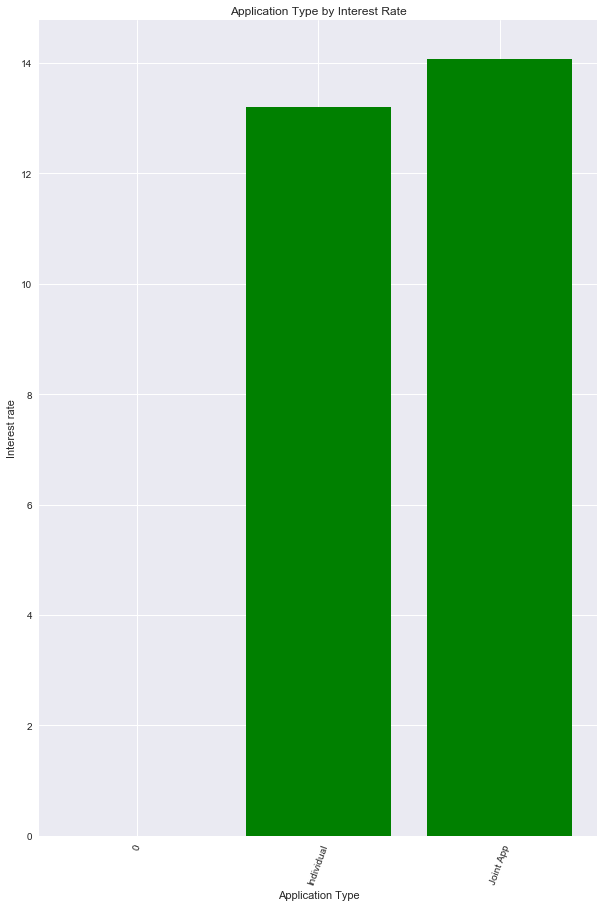

In [26]:
apptype_issueyear_trend=load_data[['application_type','int_rate','issue_year']].groupby(['application_type','issue_year'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(apptype_issueyear_trend)

apptype_trend=load_data[['application_type','int_rate']].groupby(['application_type'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(apptype_trend)

x = np.array(range(len(apptype_trend)))
y = apptype_trend['mean']
my_xticks = apptype_trend['application_type']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='green')
plt.title('Application Type by Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Application Type')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Employment Length by Interest Rate
We analysed if the employment lenght has relations with the rate of interest provided to the borrower. Though we see that the interest rate is very close for each of the emp length. The interest rate drops as the number of employmennt increases. That is it is the leadt for a borrower with 10 years or above employment length.

    emp_length       mean
0            0  13.312760
1            1  13.244876
2            2  13.238214
3            3  13.226847
4            4  13.251973
5            5  13.279984
6            6  13.325326
7            7  13.339796
8            8  13.198208
9            9  13.210866
10          10  13.139539


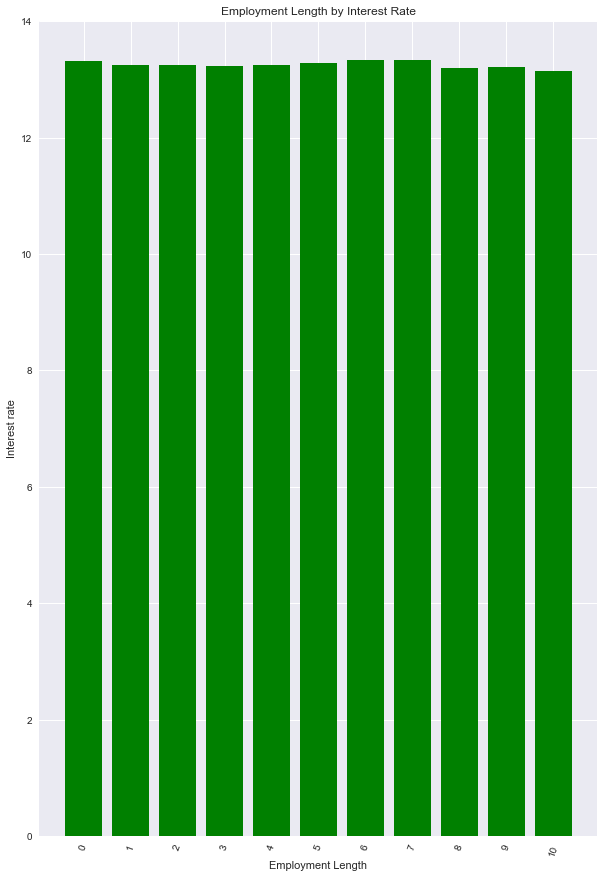

In [27]:
emplen_intrate_trend=load_data[['emp_length','int_rate']].groupby(['emp_length'])['int_rate'].mean().reset_index(name='mean').sort_values(['emp_length'],ascending=True)
print(emplen_intrate_trend)


x = np.array(range(len(emplen_intrate_trend)))
y = emplen_intrate_trend['mean']
my_xticks = emplen_intrate_trend['emp_length']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='green')
plt.title('Employment Length by Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Employment Length')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Loan Status by Loan Amount

The Loan Amount is the highest for Loan Status - Late

                                          loan_status          mean
0                                                   0      0.000000
5   Does not meet the credit policy. Status:Fully ...   8853.231891
4   Does not meet the credit policy. Status:Charge...   9527.233903
6                                          Fully Paid  14018.302991
2                                             Current  15072.552786
3                                             Default  15277.444444
1                                         Charged Off  15370.616461
10                                 Late (31-120 days)  15916.865063
8                                              Issued  16046.574074
7                                     In Grace Period  16290.333022
9                                   Late (16-30 days)  16358.568971


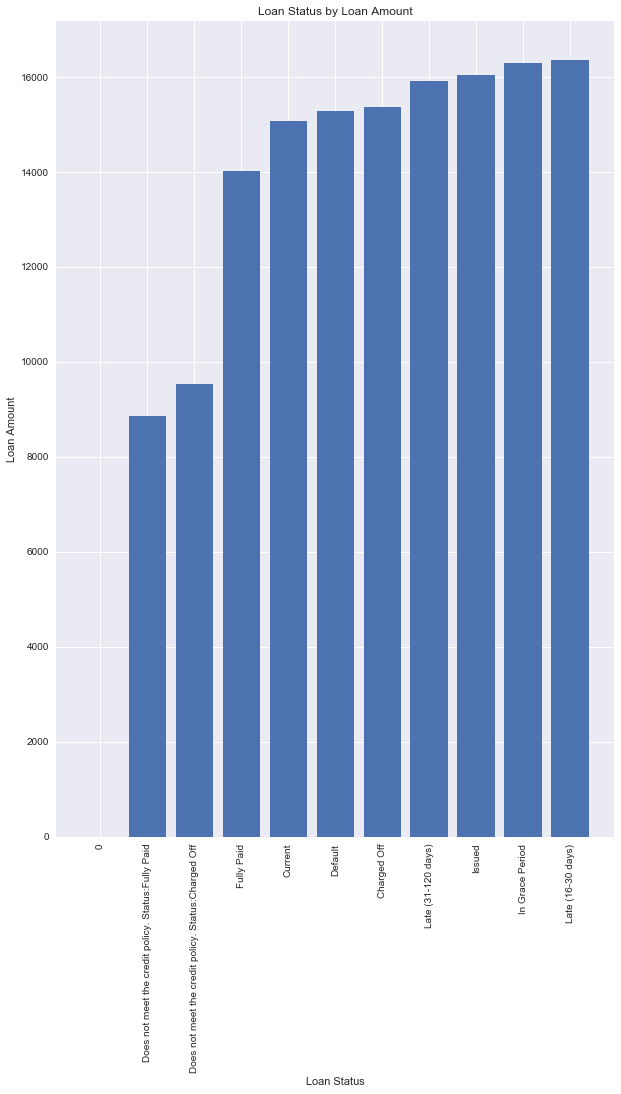

In [28]:
import matplotlib.patches as mpatches
loanstatus_loanamt_trend=load_data[['loan_status','loan_amnt']].groupby(['loan_status'])['loan_amnt'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(loanstatus_loanamt_trend)


x = np.array(range(len(loanstatus_loanamt_trend)))
y = loanstatus_loanamt_trend['mean']
my_xticks = loanstatus_loanamt_trend['loan_status']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=90)
# my_colors = []
# NA = mpatches.Patch(color='red', label='Late(31-120)')
# EU = mpatches.Patch(color='green', label='Issued')
# AP = mpatches.Patch(color='red', label='In Grace Period')
# SA = mpatches.Patch(color='yellow', label='Late (16-30 days)')
# MA=mpatches.Patch(color='maroon', label='Fully')
# KA=mpatches.Patch(color='blue', label='Charged')
# BA=mpatches.Patch(color='maroon', label='Fully Paid')
# TA=mpatches.Patch(color='maroon', label='Current')
# LA=mpatches.Patch(color='maroon', label='Default')
# NA=mpatches.Patch(color='maroon', label='Charged Off')


# plt.legend(handles=[NA,EU,AP,SA,MA,KA,BA,TA,LA,NA], loc=2)
plt.bar(x,y)
plt.title('Loan Status by Loan Amount')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Mortgage Account and Interest Rate

The Interest rate was the highest for number of Mortagae Accounts of 37

    emp_length       mean
0            0  13.312760
1            1  13.244876
2            2  13.238214
3            3  13.226847
4            4  13.251973
5            5  13.279984
6            6  13.325326
7            7  13.339796
8            8  13.198208
9            9  13.210866
10          10  13.139539


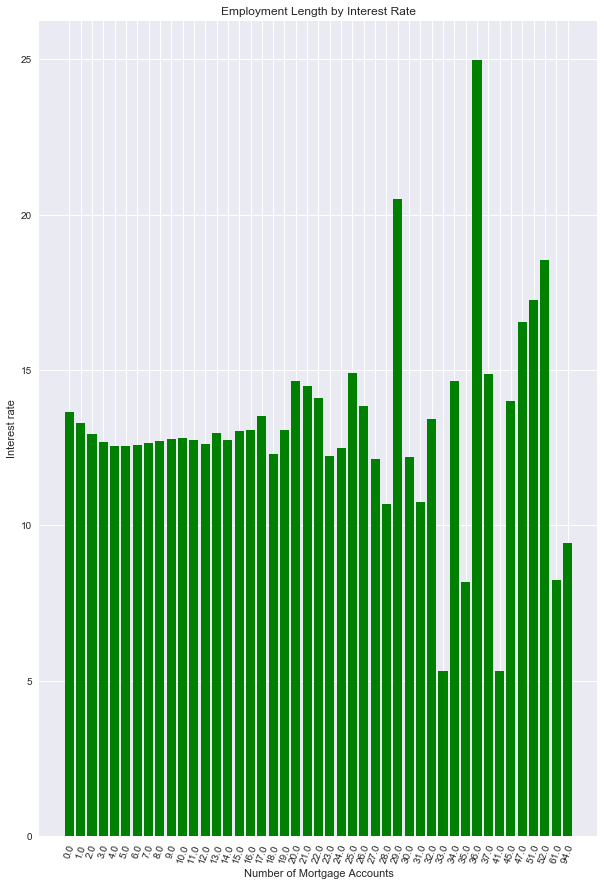

In [29]:
mort_trend=load_data[['mort_acc','int_rate']].groupby(['mort_acc'])['int_rate'].mean().reset_index(name='mean').sort_values(['mort_acc'],ascending=True)
print(emplen_intrate_trend)


x = np.array(range(len(mort_trend)))
y = mort_trend['mean']
my_xticks = mort_trend['mort_acc']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='green')
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Employment Length by Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Number of Mortgage Accounts')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Home Ownership with Interest Rate

Next we evaluated if home ownership had a relation with interest rate. As per the graph we observe that the interest rate was the highest for borrowers who had their homes on rent whoch is predictable considering that they do not have a property of their own hence, interest rate is higher

  home_ownership       mean
0              0   0.000000
2       MORTGAGE  12.882432
1            ANY  13.167613
5            OWN  13.263916
4          OTHER  13.462143
6           RENT  13.625669
3           NONE  14.291481


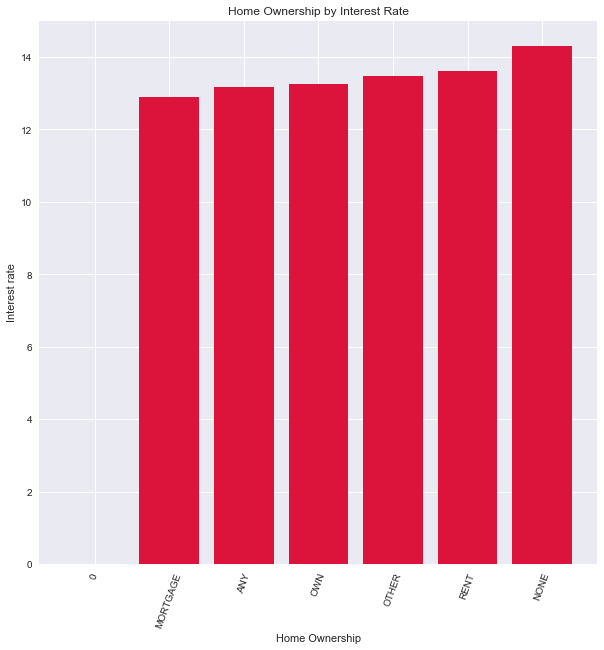

In [30]:
load_data['home_ownership'] = load_data['home_ownership'].astype(str)
curbal_trend=load_data[['home_ownership','int_rate']].groupby(['home_ownership'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(curbal_trend)

x = np.array(range(len(curbal_trend)))
y = curbal_trend['mean']
my_xticks = curbal_trend['home_ownership']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='crimson')
plt.title('Home Ownership by Interest Rate')
plt.ylabel('Interest rate')
plt.xlabel('Home Ownership')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Credit revolving Balance with Interest Rate

In [31]:
# load_data['home_ownership'] = load_data['home_ownership'].astype(str)
rev_trend=load_data[['emp_title','revol_bal']].groupby(['emp_title'])['revol_bal'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False).head(5)
print(rev_trend)


                       emp_title       mean
415405           plastic surgery  1743266.0
361586   VP of Advanced Services  1696796.0
3477         AB Physical Therapy  1207359.0
62025   Chief Legal Risk Officer  1087664.0
359925   VISIUM asset management   975800.0


#### Analysis of Credit Inquiries with employee titles and Interest Rate

In order to analyse if the credit inquiries had an impact on the interest rate, we first analysed top emp titles with the most number of inquiries. Next, we checked the emp titles witht the minimum interest rates. As a result we observe that number of inquiries do not have an impact on the interest rate.


               emp_title      sum
0                      0  63089.0
200240           Manager  14756.0
340186           Teacher  14726.0
235176             Owner   9671.0
274764  Registered Nurse   6889.0


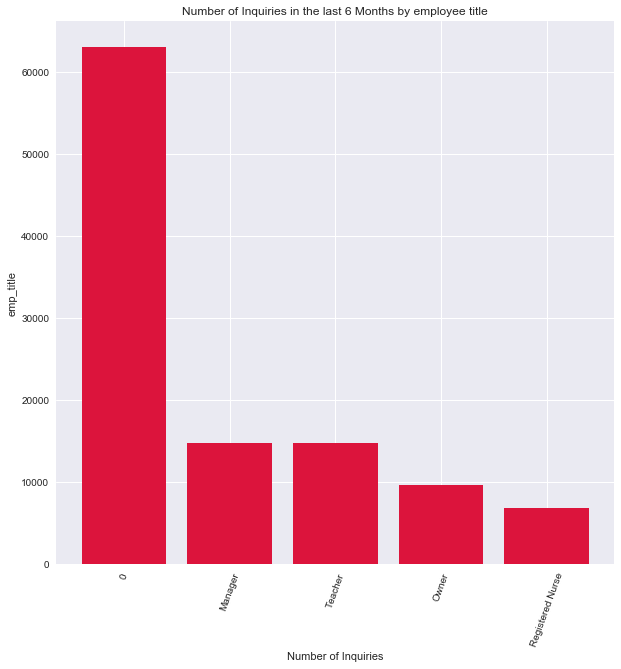

                 emp_title  mean
184775    Lead Patient Rep  5.32
306946  Service Group Lead  5.32
397086           frt tream  5.32
397129                ftw4  5.32
96988    Dir of Purchasing  5.32


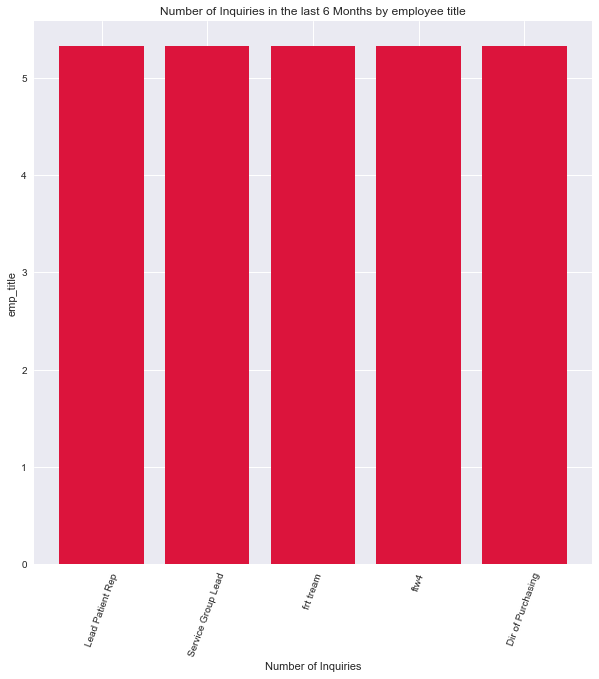

In [32]:
# load_data['home_ownership'] = load_data['home_ownership'].astype(str)
inq_trend=load_data[['emp_title','inq_last_6mths']].groupby(['emp_title'])['inq_last_6mths'].sum().reset_index(name='sum').sort_values(['sum'],ascending=False).head(5)
print(inq_trend)

x = np.array(range(len(inq_trend)))
y = inq_trend['sum']
my_xticks = inq_trend['emp_title']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='crimson')
plt.title('Number of Inquiries in the last 6 Months by employee title')
plt.ylabel('emp_title')
plt.xlabel('Number of Inquiries')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

int_trend=load_data[['emp_title','int_rate']].groupby(['emp_title'])['int_rate'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False).tail(5)
print(int_trend)

x = np.array(range(len(int_trend)))
y = int_trend['mean']
my_xticks = int_trend['emp_title']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='crimson')
plt.title('Number of Inquiries in the last 6 Months by employee title')
plt.ylabel('emp_title')
plt.xlabel('Number of Inquiries')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

## Exploratory Data Analysis of Rejected Loan Data Set

In [8]:
declined_load_data=pd.read_csv("AllRejectedLoanData.csv",encoding = "ISO-8859-1")

C:\Users\jaini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#Cleaning data start

#renaming columns for ease of use
declined_load_data=declined_load_data.rename(columns={'Zip Code':'zip_code','Loan Title':'loan_title','Application Date':'application_date','Employment Length':'emp_length','Policy Code':'policy_code','Amount Requested':'amount_requested','Debt-To-Income Ratio':'dti'})

#finding the shape of the data and removing columns with more than 80% missing values
sh=declined_load_data.shape
for column in declined_load_data.columns:
    colmiss=(declined_load_data[column].isnull().sum())/sh[0]
    if colmiss>0.8:
        declined_load_data.drop(column,axis=1,inplace=True)

#Removing zip code as it wont be useful in our analysis and it has xx in it so of no use        
declined_load_data.drop('zip_code',axis=1,inplace=True)
#Filling missing risk scores with zero
declined_load_data['Risk_Score'].fillna(0,inplace=True)

#stripping % signs from dti to make it usefule for our algorithm and changing its data type to numeric
declined_load_data['dti']=pd.Series(declined_load_data.dti ).str.replace('%', '').str.strip()

#removing n/a values from emp_length and filling the missing values with 0
#also removing signs like + < > and years and year to make it an int and usefule for our algorithm
declined_load_data['emp_length'].replace('n/a',0,inplace=True)
declined_load_data['emp_length']=pd.Series(declined_load_data.emp_length).str.replace('+', '').str.strip()
declined_load_data['emp_length']=pd.Series(declined_load_data.emp_length).str.replace('<', '').str.strip()
declined_load_data['emp_length']=pd.Series(declined_load_data.emp_length).str.replace('years', '').str.strip()
declined_load_data['emp_length']=pd.Series(declined_load_data.emp_length).str.replace('year', '').str.strip()
declined_load_data['emp_length'].fillna(0,inplace=True)
declined_load_data['emp_length']=declined_load_data['emp_length'].astype(int)

#Filling the missing categorical values with NA meaning not available
declined_load_data['loan_title'].fillna('NA',inplace=True)
declined_load_data['State'].fillna('NA',inplace=True)

#Filling the policy_code with maximum occuring value which is 0
declined_load_data['policy_code'].fillna(0,inplace=True)

#changing the datatype of dti after removing the % signs from it
declined_load_data['dti']=declined_load_data['dti'].astype(float)

#fetching the months and year values from the application date so that it can be used in our algorithm
declined_load_data['application_date']=pd.to_datetime(declined_load_data['application_date'])
def month_func(ts):
    return ts.month

declined_load_data['app_month']=declined_load_data['application_date'].apply(month_func)
def year_func(ts):
    return ts.year

declined_load_data['app_year']=declined_load_data['application_date'].apply(year_func)

#dropping the application date as all useful info has been extracted from it
declined_load_data.drop('application_date',axis=1,inplace=True)

#cleaning data end

In [132]:
declined_load_data.columns


Index(['Unnamed: 0', 'amount_requested', 'loan_title', 'Risk_Score', 'dti',
       'State', 'emp_length', 'policy_code', 'timestamp', 'app_month',
       'app_year'],
      dtype='object')

### Analysis of Risk Score and Employment Length

As per the rejected loan data set the mean risk score is the highest for a borrower who has a an employment lenght of 7 years. Hence there are other factors involved in rejecting a loan apart from risk score.

    emp_length        mean
5            5   65.559981
0            0  130.701802
1            1  296.449992
2            2  362.120580
3            3  376.046529
4            4  386.263030
8            8  418.572313
9            9  430.079468
6            6  435.727986
10          10  437.140844
7            7  448.281416


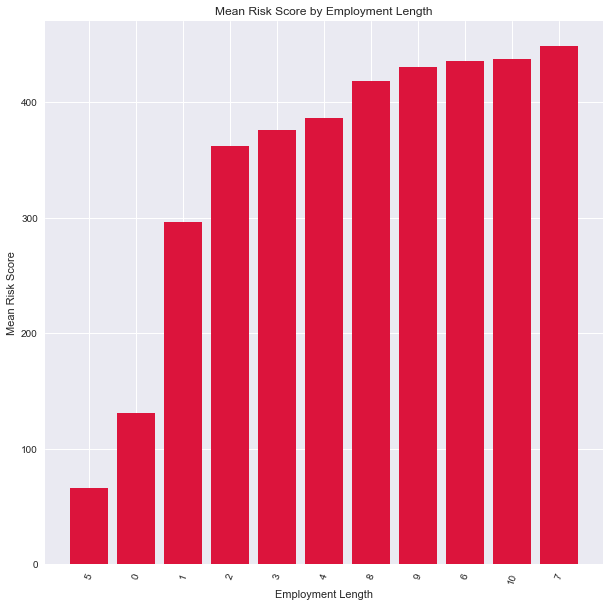

In [129]:
# load_data['home_ownership'] = load_data['home_ownership'].astype(str)
emplen_trend=declined_load_data[['emp_length','Risk_Score']].groupby(['emp_length'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['mean'],ascending=True)
print(emplen_trend)

x = np.array(range(len(emplen_trend)))
y = emplen_trend['mean']
my_xticks = emplen_trend['emp_length']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='crimson')
plt.title('Mean Risk Score by Employment Length')
plt.ylabel('Mean Risk Score')
plt.xlabel('Employment Length')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

## Analysis of Approval of Loans

Next we analyse Approval by various features. The loans that have been approved have Approval=1 and loans that are not approved have Approval=0. We first combine the data of Approved and Rejected Loans. First we established all the columns common to both data sets.





In [47]:
declined_load_data.columns

Index(['amount_requested', 'loan_title', 'Risk_Score', 'dti', 'State',
       'emp_length', 'policy_code', 'timestamp', 'app_month', 'app_year'],
      dtype='object')

Identified the common columns in the declined loan dataset

In [50]:
import numpy as np
### Since issue year in accepted loans is equivalent to application date
declined_cols=pd.DataFrame()
declined_load_data['issue_year']=declined_load_data['app_year']
# declined_col_list=declined_load_data['amount_requested','Risk_Score', 'dti','State', 'emp_length','issue_year']
# declined_cols = pd.DataFrame(np.array(declined_col_list))
declined_cols=declined_load_data[['amount_requested','Risk_Score','dti','State', 'emp_length','issue_year']]
declined_cols['Approval']=0
declined_cols.head()

C:\Users\jaini\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,amount_requested,Risk_Score,dti,State,emp_length,issue_year,Approval
0,1000.0,693.0,10.00,NM,4,2007,0
1,1000.0,703.0,10.00,MA,1,2007,0
2,11000.0,715.0,10.00,MD,1,2007,0
3,6000.0,698.0,38.64,MA,1,2007,0
4,1500.0,509.0,9.43,MD,1,2007,0


In [51]:
load_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'timestamp', 'issue_year', 'issue_month', 'Risk_Score'],
      dtype='object', length=114)

Identified the common columns in the accepted loan dataset

In [52]:
accepted_cols=pd.DataFrame()
accepted_cols=load_data[['loan_amnt','Risk_Score','dti','addr_state', 'emp_length','issue_year']]
accepted_cols['Approval']=1
accepted_cols.columns=['amount_requested','Risk_Score','dti','State', 'emp_length','issue_year','Approval']
accepted_cols.head()

C:\Users\jaini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,amount_requested,Risk_Score,dti,State,emp_length,issue_year,Approval
0,5000.0,737.0,27.65,AZ,10,2011,1
1,2500.0,742.0,1.00,GA,1,2011,1
2,2400.0,737.0,8.72,IL,10,2011,1
3,10000.0,692.0,20.00,CA,10,2011,1
4,3000.0,697.0,17.94,OR,1,2011,1


#### Concat both dataframes

In [53]:
combine_loan_data=pd.DataFrame()
decline=declined_cols
accept=accepted_cols
combine_loan_data=pd.concat([decline,accept],axis=0)
combine_loan_data.to_csv("combineloandata.csv",index=False)

#### Analysis of Risk Score with Approval and Issue Year¶
From the heat map it is clearly visible that Approval score of 0 have varied risk scores of less than 150 and greater than 450 for the years of 2017 and 2012 respectively. Loans that were approved have conssitent risk scores of above 450.

    issue_year  Approval        mean
22        2017         1  700.229349
21        2017         0  266.999465
20        2016         1  697.378663
19        2016         0  135.230525
18        2015         1  695.649924
17        2015         0  113.743341
16        2014         1  694.497345
15        2014         0  549.520121
14        2013         1  696.998338
13        2013         0  591.493768
12        2012         1  703.387407
11        2012         0  597.619667
10        2011         1  716.991713
9         2011         0  571.325825
8         2010         1  715.041796
7         2010         0  541.403248
6         2009         1  716.965916
5         2009         0  515.131284
4         2008         1  699.101964
3         2008         0  516.201516
1         2007         0  539.419416
2         2007         1  691.966833
0            0         1    0.000000


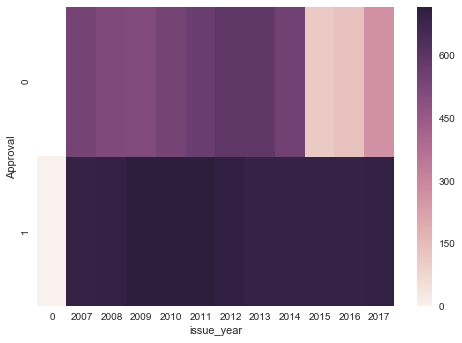

In [78]:
approval_risk_trend=combine_loan_data[['issue_year','Risk_Score','Approval']].groupby(['issue_year','Approval'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=False)
print(approval_risk_trend)
# g = sns.factorplot(x="issue_year", y="count", hue="Approval", data=approval_trend,size=7, kind="bar", palette="muted")
# g.despine(left=True)
# plt.show()
flights = approval_risk_trend.pivot("Approval","issue_year","mean")
ax = sns.heatmap(flights)
plt.show()



##Analysis of Average Interest Rate by Issue Year
##Mean Interest Rate was maximum in year 2013

#### Analysis of Approval Status with Issue Year

In [185]:
# load_data['home_ownership'] = load_data['home_ownership'].astype(str)
approval_year_trend=combine_loan_data[['Approval','issue_year']].groupby(['issue_year','Approval'])['Approval'].count().reset_index(name='count').sort_values(['count'],ascending=False)
print(approval_year_trend)

# x = np.array(range(len(emplen_trend)))
# y = emplen_trend['mean']
# my_xticks = emplen_trend['emp_length']
# #plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
# plt.xticks(x, my_xticks)
# #plt.plot(x,y)
# plt.xticks(rotation=70)
# plt.bar(x,y,color='crimson')
# plt.title('Mean Risk Score by Employment Length')
# plt.ylabel('Mean Risk Score')
# plt.xlabel('Employment Length')
# # plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
# #droppingcolumn fintime
# plt.show()
# plt.clf()

   issue_year  Approval    count
11       2017         0  5052074
10       2016         0  4769858
9        2015         0  2859375
8        2014         0  1933696
7        2013         0   760942
21       2016         1   434407
20       2015         1   421095
6        2012         0   337273
22       2017         1   324931
19       2014         1   235629
5        2011         0   217792
18       2013         1   134814
4        2010         0   112561
3        2009         0    56991
17       2012         1    53367
2        2008         0    25596
16       2011         1    21721
15       2010         1    12537
14       2009         1     5281
1        2007         0     5274
13       2008         1     2393
12       2007         1      603
0           0         1        1


#### Analysis of Count of Approvals and Rejects by Issue Year
Analysed the comparison Approvals and Rejects by the Issue Year. Highest number of rejects were for the year 2017 and the highest approvals were for the year 2016

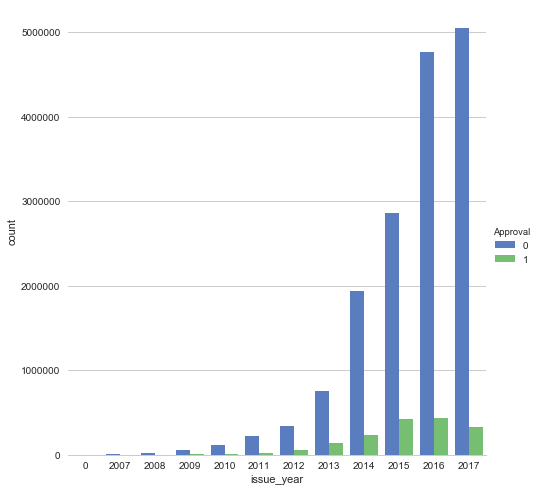

In [234]:
import seaborn as sns
sns.set(style="whitegrid")
approval_trend=combine_loan_data[['Approval','issue_year']].groupby(['issue_year','Approval'])['Approval'].count().reset_index(name='count').sort_values(['Approval'],ascending=False)

g = sns.factorplot(x="issue_year", y="count", hue="Approval", data=approval_trend,size=7, kind="bar", palette="muted")
g.despine(left=True)
plt.show()

#### Analysis of Number of Approvals and Number of rejects

   Approval     count
0         0  16131432
1         1   1646779


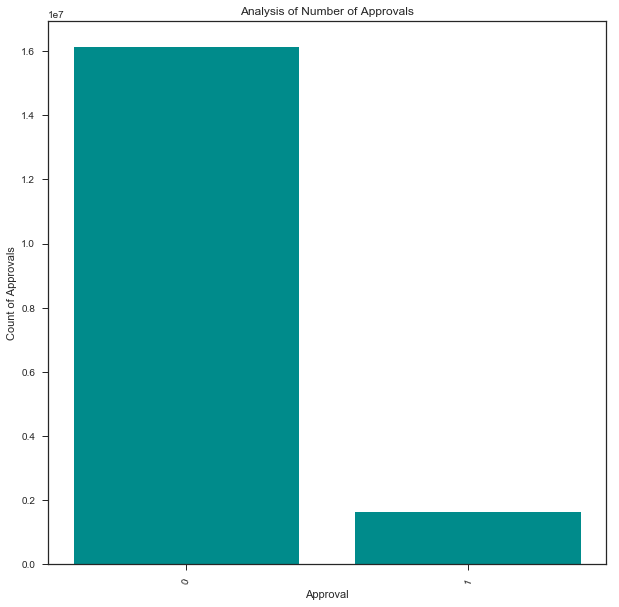

In [186]:
approval_trend=combine_loan_data[['Approval']].groupby(['Approval'])['Approval'].count().reset_index(name='count').sort_values(['count'],ascending=False)
print(approval_trend)

x = np.array(range(len(approval_trend)))
y = approval_trend['count']
my_xticks = approval_trend['Approval']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='darkcyan')
plt.title('Analysis of Number of Approvals')
plt.ylabel('Count of Approvals')
plt.xlabel('Approval')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Risk Score with Approval

Mean Risk score was analysed for Loans that were accepted and rejected

   Approval        mean
1         1  697.706483
0         0  264.341761


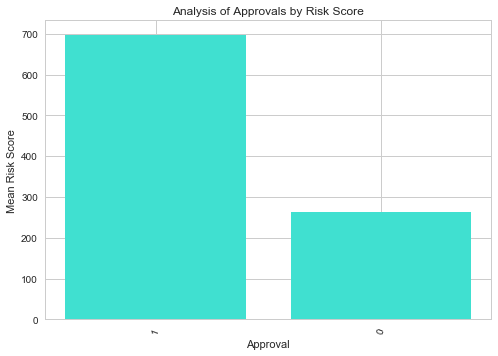

In [77]:
approval_trend=combine_loan_data[['Approval','Risk_Score']].groupby(['Approval'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
print(approval_trend)

x = np.array(range(len(approval_trend)))
y = approval_trend['mean']
my_xticks = approval_trend['Approval']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='turquoise')
plt.title('Analysis of Approvals by Risk Score')
plt.ylabel('Mean Risk Score')
plt.xlabel('Approval')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

### Analysis of Employment Length by Mean Risk Score

We observe that the mean risk score is the highest for employment length 9 years followed by 10 years. Another noted observation is that the 0 employment years has higher mean score than employment length of 5 years

   Approval        mean
1         1  697.706483
0         0  264.341761


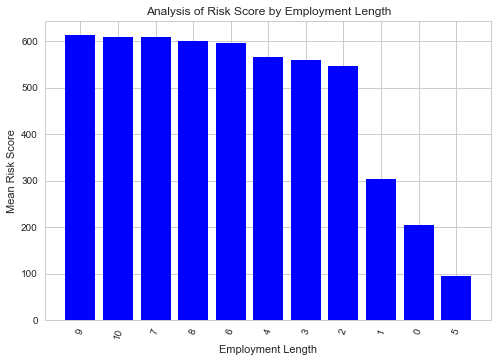

In [58]:
emp_approval_trend=combine_loan_data[['emp_length','Risk_Score']].groupby(['emp_length'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['mean'],ascending=False)
print(approval_trend)

x = np.array(range(len(emp_approval_trend)))
y = emp_approval_trend['mean']
my_xticks = emp_approval_trend['emp_length']
#plt.xticks(count_code.index, count_code['code'], rotation=90,y='count')
plt.xticks(x, my_xticks)
#plt.plot(x,y)
plt.xticks(rotation=70)
plt.bar(x,y,color='blue')
plt.title('Analysis of Risk Score by Employment Length')
plt.ylabel('Mean Risk Score')
plt.xlabel('Employment Length (years)')
# plt.savefig(os.path.join('Part1','TimeSeries.png'),dpi=100)
#droppingcolumn fintime
plt.show()
plt.clf()

#### Analysis of Risk Score with Approval and Issue Year

From the heat map it is clearly visible that Approval score of 0 have varied risk scores of less than 150 and greater than 450 for the years of 2017 and 2012 respectively. Loans that were approved have conssitent risk scores of above 450.

    issue_year  Approval        mean
22        2017         1  700.229349
21        2017         0  266.999465
20        2016         1  697.378663
19        2016         0  135.230525
18        2015         1  695.649924
17        2015         0  113.743341
16        2014         1  694.497345
15        2014         0  549.520121
14        2013         1  696.998338
13        2013         0  591.493768
12        2012         1  703.387407
11        2012         0  597.619667
10        2011         1  716.991713
9         2011         0  571.325825
8         2010         1  715.041796
7         2010         0  541.403248
6         2009         1  716.965916
5         2009         0  515.131284
4         2008         1  699.101964
3         2008         0  516.201516
1         2007         0  539.419416
2         2007         1  691.966833
0            0         1    0.000000


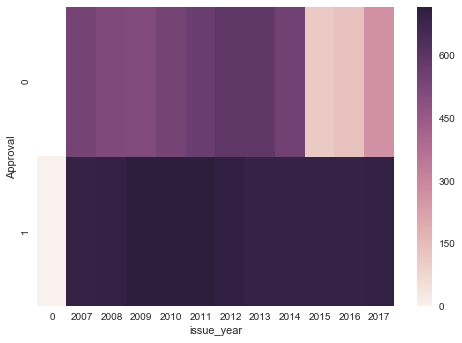

In [72]:
approval_risk_trend=combine_loan_data[['issue_year','Risk_Score','Approval']].groupby(['issue_year','Approval'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=False)
print(approval_risk_trend)
# g = sns.factorplot(x="issue_year", y="count", hue="Approval", data=approval_trend,size=7, kind="bar", palette="muted")
# g.despine(left=True)
# plt.show()
flights = approval_risk_trend.pivot("Approval","issue_year","mean")
ax = sns.heatmap(flights)
plt.show()



##Analysis of Average Interest Rate by Issue Year
##Mean Interest Rate was maximum in year 2013

#### Analysis of Mean Risk Score with emplyement length and Issue Year

We observe that the mean risk score is the highest for employment length 9 years followed by 10 years for years 2013 and 2014. Another noted observation is mean risk score is the highest for employment lenght 10 but is consistenty high for all employment years for the year 2012.

    issue_year  Approval        mean
22        2017         1  700.229349
21        2017         0  266.999465
20        2016         1  697.378663
19        2016         0  135.230525
18        2015         1  695.649924
17        2015         0  113.743341
16        2014         1  694.497345
15        2014         0  549.520121
14        2013         1  696.998338
13        2013         0  591.493768
12        2012         1  703.387407
11        2012         0  597.619667
10        2011         1  716.991713
9         2011         0  571.325825
8         2010         1  715.041796
7         2010         0  541.403248
6         2009         1  716.965916
5         2009         0  515.131284
4         2008         1  699.101964
3         2008         0  516.201516
1         2007         0  539.419416
2         2007         1  691.966833
0            0         1    0.000000


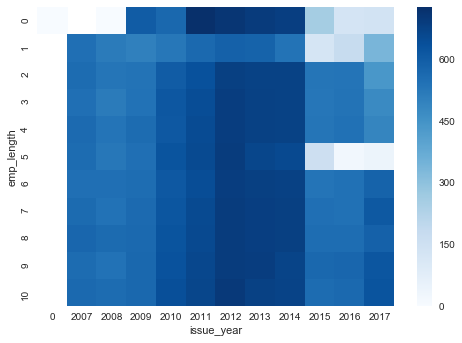

In [74]:
emp_year_trend=combine_loan_data[['issue_year','Risk_Score','emp_length']].groupby(['issue_year','emp_length'])['Risk_Score'].mean().reset_index(name='mean').sort_values(['issue_year'],ascending=False)
print(approval_risk_trend)
# g = sns.factorplot(x="issue_year", y="count", hue="Approval", data=approval_trend,size=7, kind="bar", palette="muted")
# g.despine(left=True)
# plt.show()
flights = emp_year_trend.pivot("emp_length","issue_year","mean")
ax = sns.heatmap(flights,cmap="Blues")
plt.show()



##Analysis of Average Interest Rate by Issue Year
##Mean Interest Rate was maximum in year 2013